### 📌 **Step 1: Exploratory Data Analysis (EDA)**  
- Analyze basic statistics.
- Identify key features correlated with churn.
- Segment customers based on behavioral patterns.
- Calculate Customer Lifetime Value (CLV).

In [1]:
import pandas as pd

# Load the dataset
file_path = 'online_retail_customer_churn.csv'
data = pd.read_csv(file_path)

# Display the first few rows to review the structure of the data
data.head()

,Customer_ID,Age,Gender,Annual_Income,Total_Spend,Years_as_Customer,Num_of_Purchases,Average_Transaction_Amount,Num_of_Returns,Num_of_Support_Contacts,Satisfaction_Score,Last_Purchase_Days_Ago,Email_Opt_In,Promotion_Response,Target_Churn
0,1,62,Other,45.15,5892.58,5,22,453.80,2,0,3,129,True,Responded,True
1,2,65,Male,79.51,9025.47,13,77,22.90,2,2,3,227,False,Responded,False
2,3,18,Male,29.19,618.83,13,71,50.53,5,2,2,283,False,Responded,True
3,4,21,Other,79.63,9110.30,3,33,411.83,5,3,5,226,True,Ignored,True
4,5,21,Other,77.66,5390.88,15,43,101.19,3,0,5,242,False,Unsubscribed,False


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

data = pd.read_csv('online_retail_customer_churn.csv')

# Features to segment customers
behavioral_features = ['Total_Spend', 'Average_Transaction_Amount', 'Num_of_Purchases']

# Standardize features for clustering
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data[behavioral_features])

# Perform KMeans clustering (3 segments)
kmeans = KMeans(n_clusters=3, random_state=42)
data['Segment'] = kmeans.fit_predict(scaled_features)

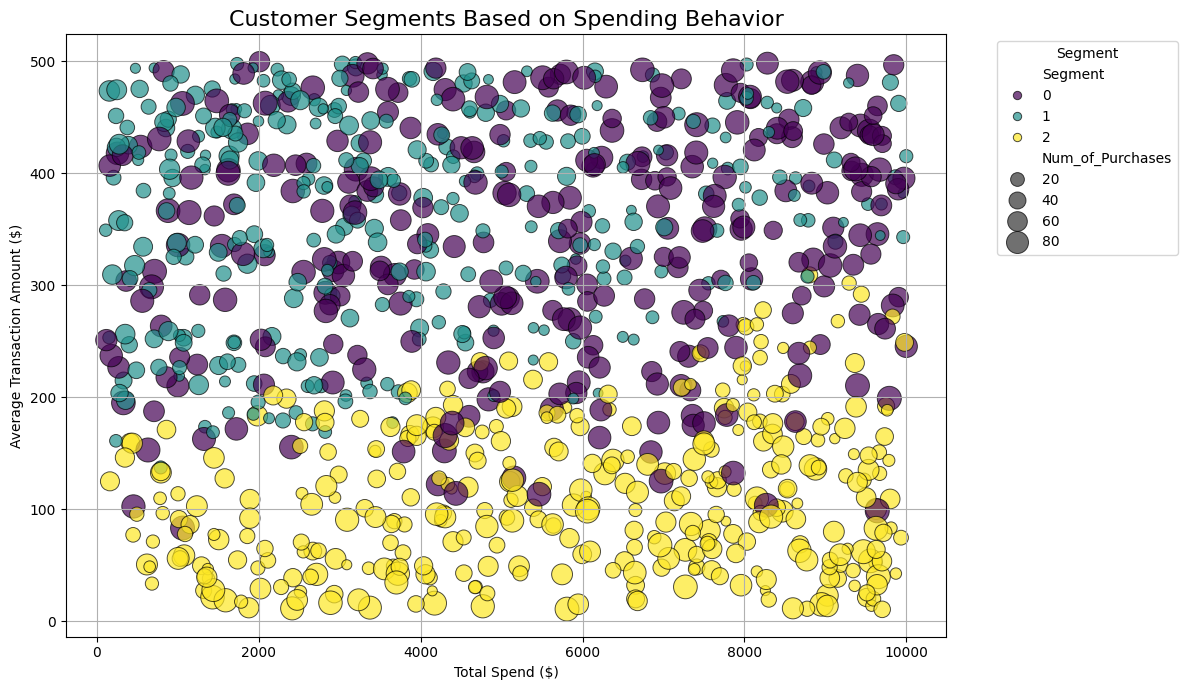

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 7))
sns.scatterplot(
    data=data,
    x='Total_Spend',
    y='Average_Transaction_Amount',
    size='Num_of_Purchases',
    sizes=(50, 300),
    hue='Segment',
    palette='viridis',
    alpha=0.7,
    edgecolor='black'
)

# Enhancing the plot aesthetics
plt.title('Customer Segments Based on Spending Behavior', fontsize=16)
plt.xlabel('Total Spend ($)')
plt.ylabel('Average Transaction Amount ($)')
plt.legend(title='Segment', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

## **Simplified CLV Calculation**

The formula is a simplified heuristic method, designed to quickly approximate a customer's value based on the available data columns in your dataset:

### **Formula Used:**


$$
CLV_{Customer} = \left(Annual\_Income \times \frac{\alpha}{100}\right) + \left(Total\_Spend \times \beta \times \frac{Years\_as\_Customer}{\max(Years\_as\_Customer)}\right)
$$



- **Annual Income component**: A proxy for potential future spending power, scaled by $\alpha$, representing how much of annual income could realistically translate into store spending.
- **Total Spend component**: Represents historical spending behavior adjusted for customer loyalty (years as customer). The longer the relationship, the higher the expected future value.

### Example used in previous code:

In [4]:
# Parameters chosen for simplicity (can be tuned further):
alpha = 1.0  # weight of annual income in percentage terms (1% of annual income)
beta = 1.0   # full weight to historical spend behavior for simplicity

data['CLV'] = (data['Annual_Income'] * alpha / 100) + \
              (data['Total_Spend'] * beta * (data['Years_as_Customer'] / data['Years_as_Customer'].max()))

### What this calculation means practically:

- **Annual Income Component** `(Annual_Income * α/100)`:
  - Captures future potential purchasing power.
  - Assumes future spending relates to a small, stable fraction of income.

- **Total Spend & Tenure Component** `(Total_Spend * β * Years_as_Customer / max_years)`:
  - Rewards customers who've demonstrated loyalty and consistent spending.
  - Scales spending based on customer tenure (longer tenure → higher confidence in future spending).

### 🚩 **Recommendations for Improvement**:

- The above formula is simplified and useful for initial exploration.
- **Real-world scenarios** might consider more robust methods:
  - **Discounted Cash Flow (DCF)** approach (incorporates churn probabilities explicitly).
  - Using **Average Transaction Amount × Purchase Frequency × Customer Lifespan**.
  - Integrating **churn probability directly** into CLV calculation.

### Recommended CLV formula for your further research:

A more standard approach (DCF) is:

$$
CLV = \text{Average\_Transaction\_Amount} \times \text{Purchase\_Frequency\_per\_year} \times \frac{1 + r}{1 + r - \text{Retention\_Rate}}
$$

Where:
- \( r \) is the discount rate (e.g., 0.1 for 10%)
- Retention Rate \(= 1 - \text{Churn Probability}\)

- **Correlation with Churn**: Features sorted by their correlation strength to churn, helping identify critical variables influencing customer churn.
- **Customer Segmentation and CLV**: An initial segmentation of customers into three behavioral segments and a simplified approximation of Customer Lifetime Value (CLV).

Correlation with Churn:


,Feature,Correlation
0,Target_Churn,1.000000
1,Target_Churn_Binary,1.000000
2,Customer_ID,0.043034
3,Total_Spend,0.028659
4,Satisfaction_Score,0.022567
5,Num_of_Support_Contacts,0.009593
6,CLV,0.002607
7,Num_of_Returns,0.000061
8,Email_Opt_In,-0.001019
9,Age,-0.009260


Customer Segmentation and CLV (first 5 rows):


,Customer_ID,Segment,CLV,Target_Churn
0,1,1,1551.130447,True
1,2,2,6176.116679,False
2,3,2,423.701900,True
3,4,1,1439.264721,True
4,5,2,4256.734495,False


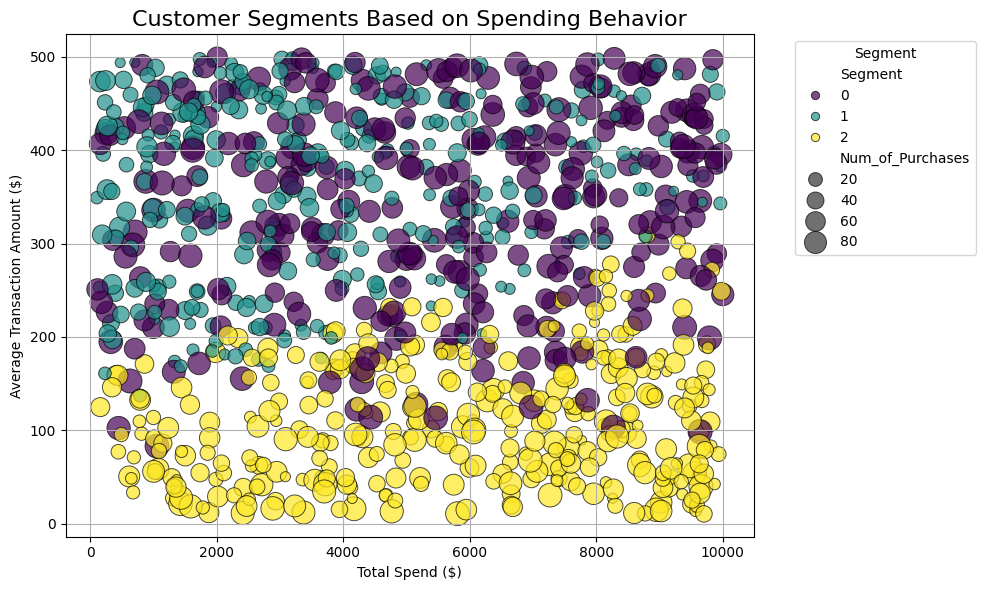

In [4]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
data = pd.read_csv('online_retail_customer_churn.csv')

# Calculate Customer Lifetime Value (CLV)
alpha = 1.0
beta = 1.0
data['CLV'] = (data['Annual_Income'] * (alpha / 100)) + \
              (data['Total_Spend'] * beta * (data['Years_as_Customer'] / data['Years_as_Customer'].max()))

# Correlation Analysis
data['Target_Churn_Binary'] = data['Target_Churn'].astype(int)
correlation_with_churn = data.corr(numeric_only=True)['Target_Churn_Binary'].sort_values(ascending=False)
correlation_df = pd.DataFrame(correlation_with_churn).reset_index().rename(columns={'index': 'Feature', 'Target_Churn_Binary': 'Correlation'})

# Display Correlation with Churn
print("Correlation with Churn:")
display(correlation_df)

# Customer Segmentation using KMeans clustering
from sklearn.preprocessing import StandardScaler

behavioral_features = ['Total_Spend', 'Average_Transaction_Amount', 'Num_of_Purchases']
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data[behavioral_features])

kmeans = KMeans(n_clusters=3, random_state=42)
data['Segment'] = kmeans.fit_predict(scaled_features)

# Display first rows of segmentation and CLV data
print("Customer Segmentation and CLV (first 5 rows):")
display(data[['Customer_ID', 'Segment', 'CLV', 'Target_Churn']].head())

# Visualization of Customer Segments Based on Spending Behavior
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=data,
    x='Total_Spend',
    y='Average_Transaction_Amount',
    hue='Segment',
    palette='viridis',
    size='Num_of_Purchases',
    sizes=(50, 300),
    alpha=0.7,
    edgecolor='black'
)

# Enhancing the plot aesthetics
plt.title('Customer Segments Based on Spending Behavior', fontsize=16)
plt.xlabel('Total Spend ($)')
plt.ylabel('Average Transaction Amount ($)')
plt.legend(title='Segment', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


### ✅ **Explanation of Visualization:**

- **X-axis:** `Total_Spend` (Total annual spending)
- **Y-axis:** `Average_Transaction_Amount` (Average spend per purchase)
- **Bubble size:** `Num_of_Purchases` (Frequency of purchases)
- **Color (hue):** Customer segment (identified by clustering algorithm)